#Interact with the NVIDIA System Management Interface (NVSMI)

In [1]:
!nvidia-smi

Wed Apr 17 16:21:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Prepare Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir data/

In [7]:
!cp /content/drive/MyDrive/Unit_Nuclea_Dataset/data-science-bowl-2018.zip /content/data/

In [8]:
%cd /content/data

/content/data


In [9]:
!unzip data-science-bowl-2018.zip

Archive:  data-science-bowl-2018.zip
  inflating: stage1_sample_submission.csv.zip  
  inflating: stage1_solution.csv.zip  
  inflating: stage1_test.zip         
  inflating: stage1_train.zip        
  inflating: stage1_train_labels.csv.zip  
  inflating: stage2_sample_submission_final.csv.zip  
  inflating: stage2_test_final.zip   


In [10]:
!mkdir ../datasets_used

In [11]:
!unzip stage1_train.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/160cf18b03df69978e2ed33335afcd781ebebf4ee42df566aaa6fd0aee66ac93.png  
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/16d3bf2426e9cda0e4f435de3a0c260d17be460f1c834c1282dfd68f9fcf7509.png  
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1cfe69ef1dec8963e05ba8386a956af0073ba0bec2cc8ba534df81ef6dee905a.png  
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1d2543cd2a8134ac2ca091a230bd15270826f8dd83c6594550b7f0fc85a15f8e.png  
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/24b50e6e3406e513d47ddfa9bd85505a95a266858cffc730a9ad7bc99936b800.png  
  inflating: d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/341193ff7f035f118eabe993464e402c5485ff014e095ff5e940a0d960270737.png  
  inflating

In [12]:
!mkdir ../datasets_used/train
!mkdir ../datasets_used/test

In [13]:
!mv * ../datasets_used/train

In [14]:
!mv ../datasets_used/train/*.zip .

In [15]:
!unzip stage1_test.zip

Archive:  stage1_test.zip
   creating: 0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/
   creating: 0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac/
   creating: 0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/
   creating: 0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925/
   creating: 0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6/
   creating: 0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466/
   creating: 1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c/
   creating: 17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff/
   creating: 1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b/
   creating: 191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829/
   creating: 1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a/
   creating: 1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e/
   creating: 1d9eacb3161f1

In [16]:
!mv * ../datasets_used/test/
!mv ../datasets_used/test/*.zip .

#Check the dataset

In [17]:
%cd ..

/content


In [18]:
import os

PATH = 'datasets_used/train/'
files = os.listdir(PATH)

print('n files: ', len(files))

n files:  670


In [19]:
import matplotlib.pyplot as plt

def imshow(image):
  plt.imshow(image)
  plt.show()

In [20]:
#Creates a 5x5 array filled with zeros using the NumPy library
import numpy as np

np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

4327d27591871e9c8d317071a390d1b3dcedad05a9746175b005c41ea0d797b2
image


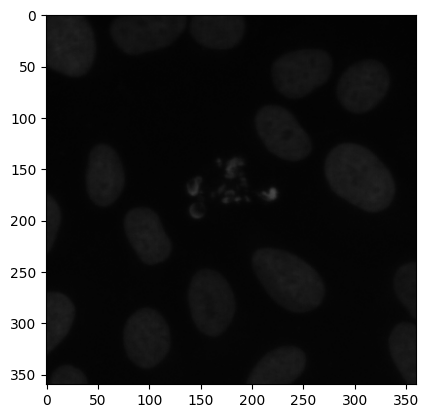

masks


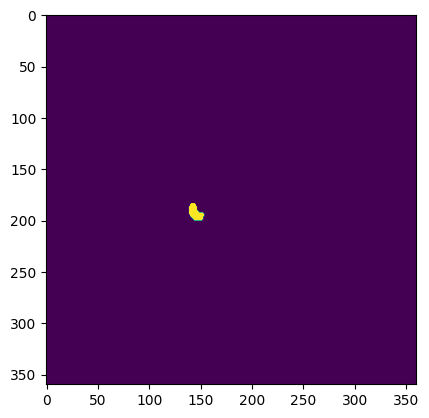

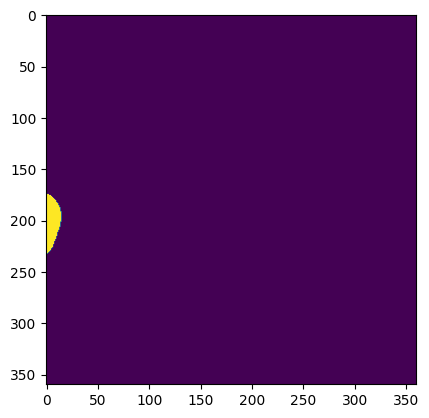

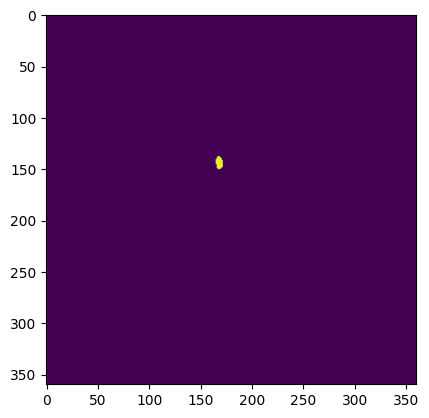

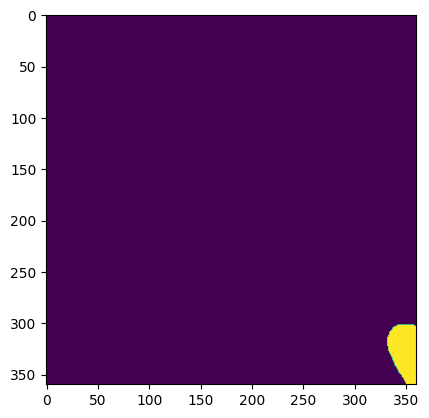

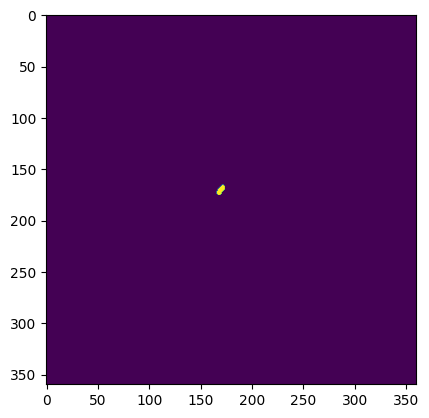

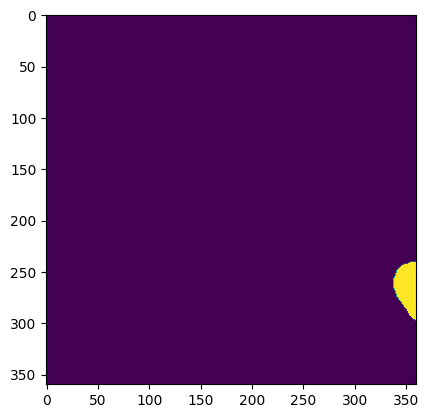

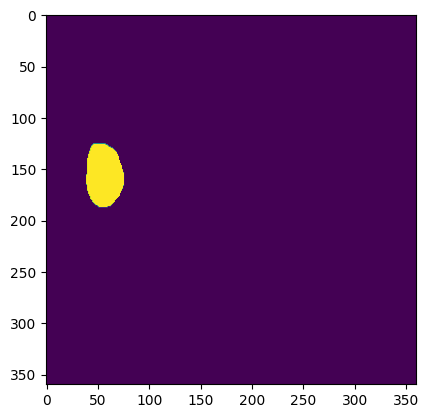

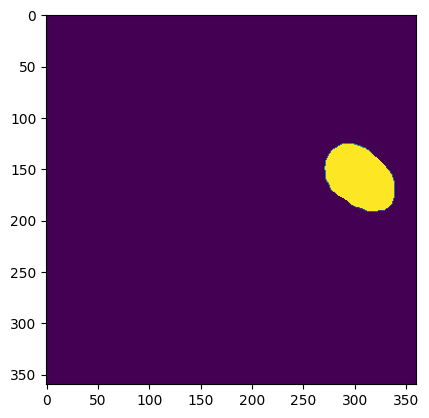

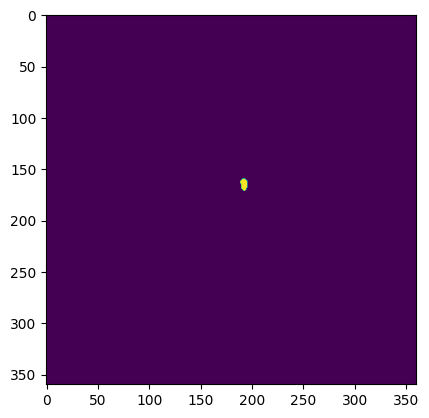

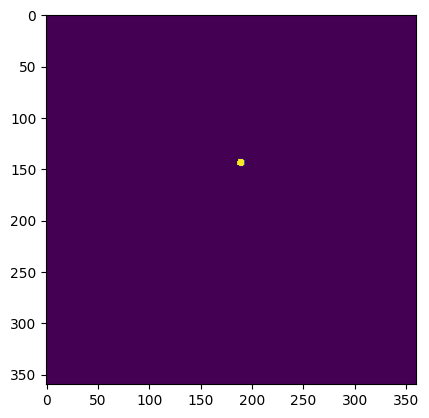

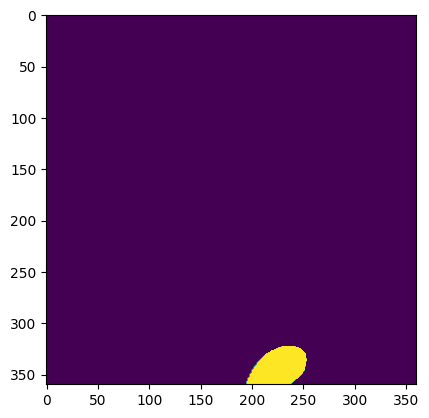

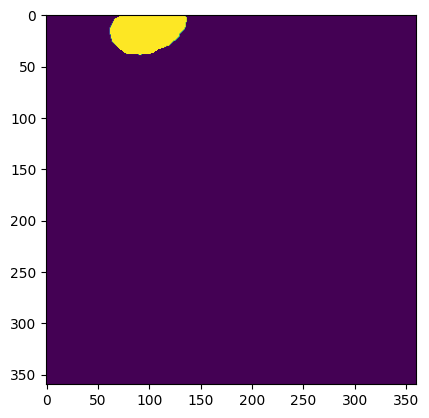

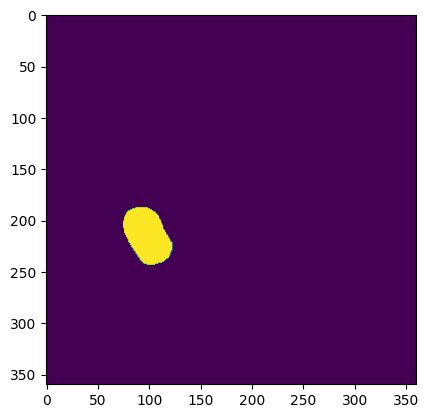

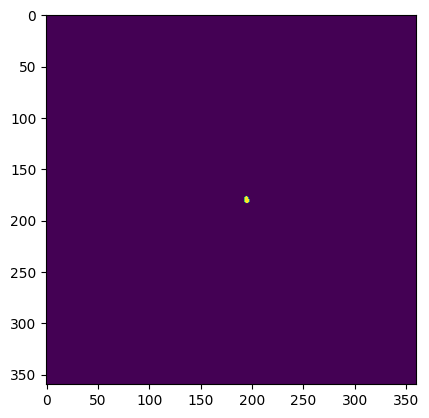

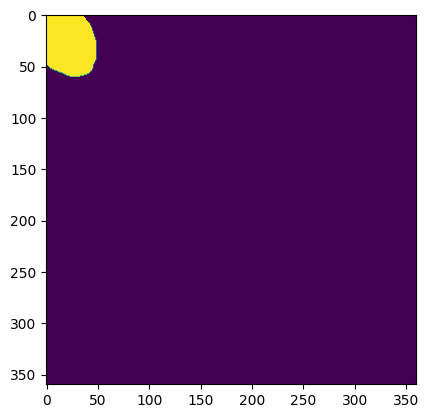

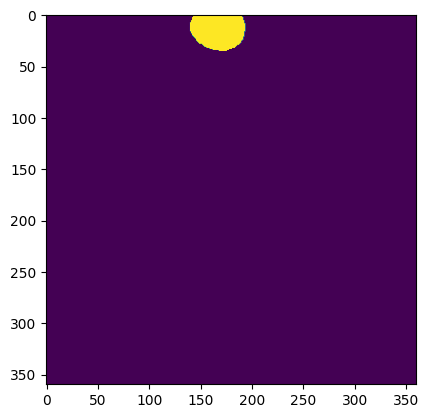

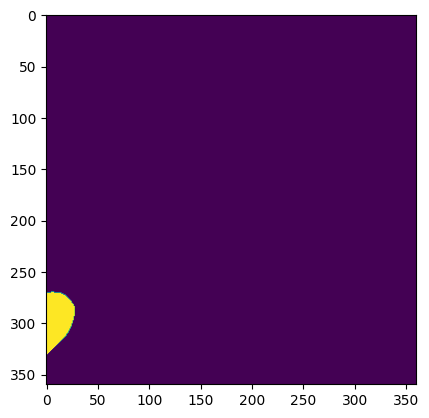

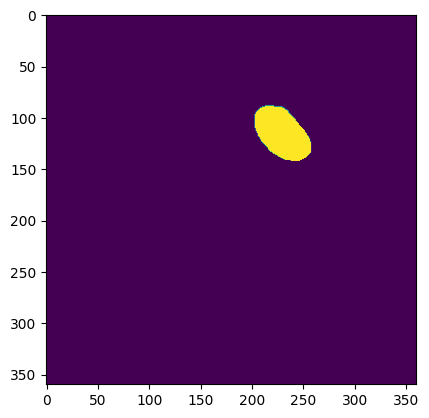

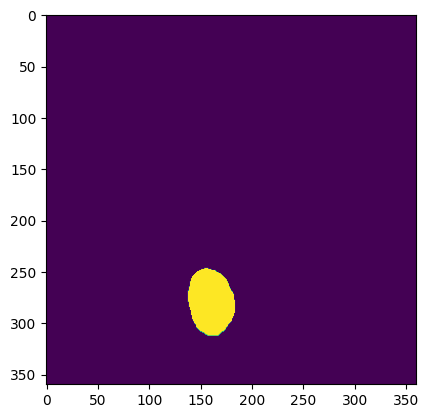

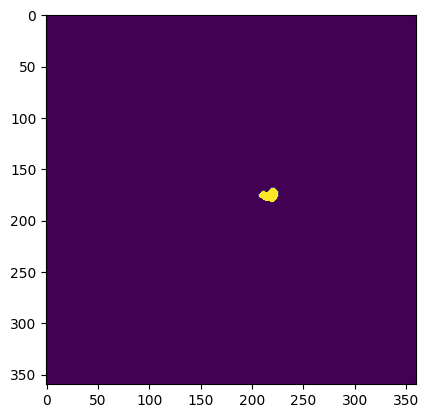

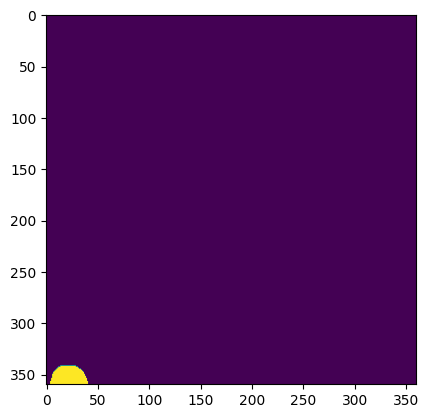

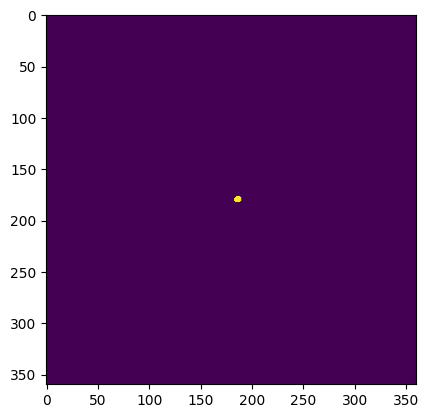

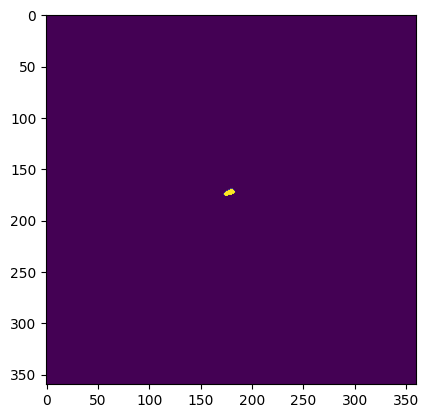

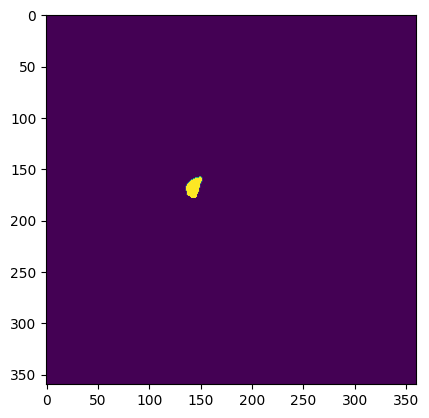

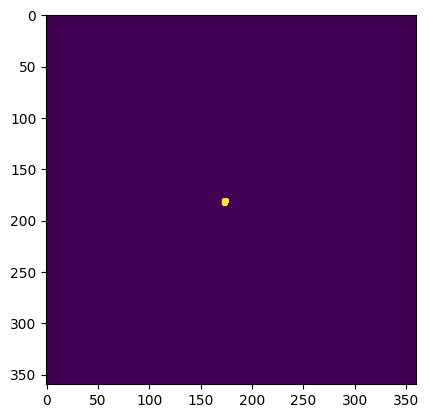

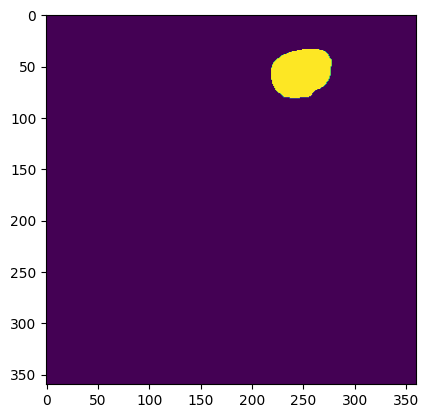

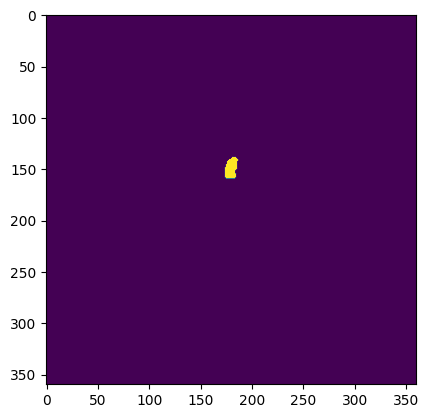

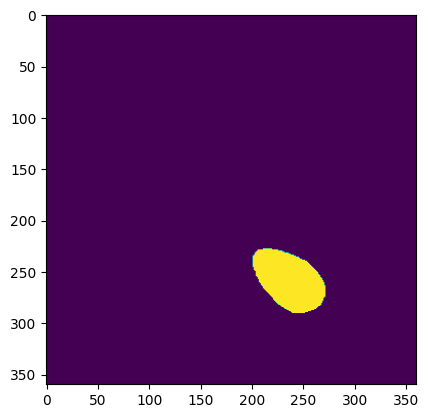

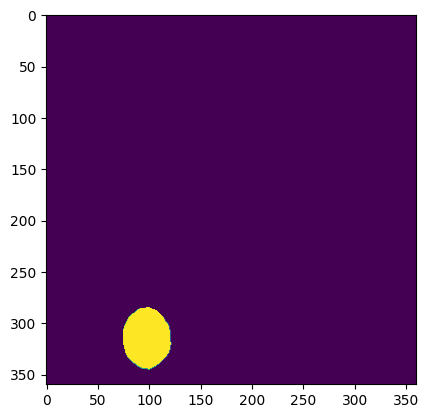

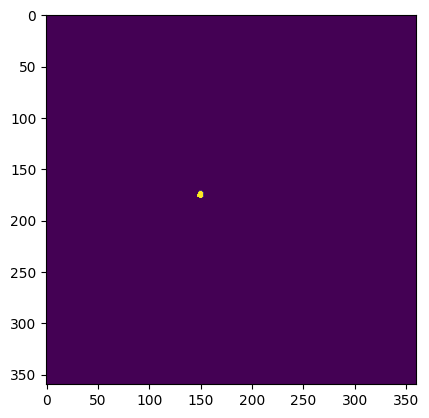

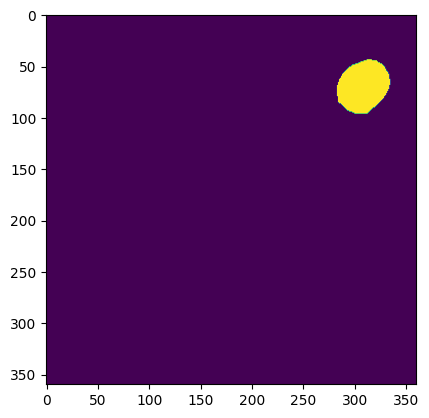

join all masks


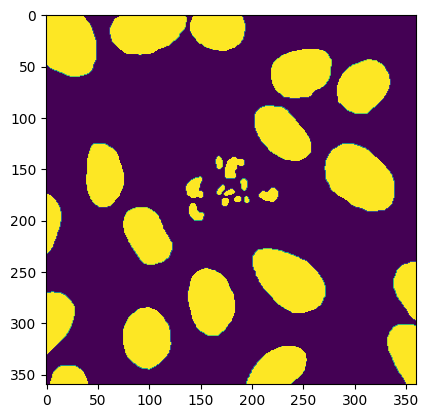

In [21]:
#visualizing an image and its corresponding masks from dataset
from PIL import Image

idx = 1
print(files[idx])
file_name = os.path.join(PATH, files[idx])
file_img = os.path.join(file_name, f'images/{files[idx]}.png')

folder_masks = os.path.join(file_name, 'masks')
file_masks = [os.path.join(folder_masks, mask) for mask in os.listdir(folder_masks)]
# print(file_masks)
image = Image.open(file_img).convert('RGB')
print('image')
image = np.array(image)
imshow(image)
print('masks')

masks = np.zeros(image.shape[:2])
for m in file_masks:
  mask = Image.open(m)
  mask = np.asarray(mask)
  imshow(mask)
  masks += mask

print('join all masks')
imshow(masks)

#Makes DataLoader

In [22]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms

In [23]:
#building the U-Net architecture from the ground up using fundamental building blocks
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

class UNET(nn.Module):
    def __init__(
            self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],
    ):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # doblemconv, dobleconv..
        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        #upsam, doubleconv, up, ..
        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(#0
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))#1

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1] # reversed(skip_connections)

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)

        return self.final_conv(x)

In [24]:
#imports the Albumentations library and defines a data transformation pipeline
import albumentations as A
from albumentations.pytorch import ToTensorV2

data_transforms = A.Compose([
    A.Resize(256,256),
    A.Normalize(),
    ToTensorV2()
])

In [25]:
#Load and pre-process image and mask data for training a U-Net model for nucleus segmentation
class NucleuData(Dataset):
  def __init__(self, files_list):
    super().__init__()
    self.files_list = files_list

  def __len__(self):
    return len(self.files_list)

  def __getitem__(self, idx):
    file_name = os.path.join(PATH, self.files_list[idx])
    file_img = os.path.join(file_name, f'images/{self.files_list[idx]}.png')

    folder_masks = os.path.join(file_name, 'masks')
    file_masks = [os.path.join(folder_masks, mask) for mask in os.listdir(folder_masks)]

    image = Image.open(file_img).convert('RGB')
    image = np.array(image)

    masks = np.zeros(image.shape[:2], dtype=np.uint8)
    for m in file_masks:
      mask = Image.open(m)
      mask = np.asarray(mask)
      masks += mask

    output = data_transforms(image=image, mask=masks)
    image = output['image']
    masks = output['mask']

    return image, masks.unsqueeze(0)/255


#Split and Training  Dataset

In [26]:
#split a list of files (files) into training and validation sets for machine learning task
split = 0.8

for i in range(10):
  np.random.shuffle(files)

train_files = files[:int(len(files)*split)]
val_files = files[int(len(files)*split):]

In [27]:
train_datasets = NucleuData(train_files)
val_datasets = NucleuData(val_files)

In [28]:
#list of lists containing training data
train_datasets[0][1].max()

tensor(1.)

In [29]:
# print the number of processing units (CPUs or cores) available to the current process.
!nproc

2


In [30]:
#creates two DataLoader objects using PyTorch
train_dataloader = DataLoader(train_datasets, batch_size=32, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_datasets, batch_size=32, shuffle=True, num_workers=2)

##Unet Architecture

In [31]:
import torchvision.transforms.functional as TF

#building block for U-Net model, consisting of two convolutional layers followed by batch normalization and ReLU activation.
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

#defines the main U-Net architecture for image segmentation task.
class UNET(nn.Module):
    def __init__(
            self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],
    ):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        for feature in reversed(features):
            self.ups.append(#0
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))#1

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1] # reversed(skip_connections)

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)

        return self.final_conv(x)

def test():
    x = torch.randn((3, 1, 160, 160))
    model = UNET(in_channels=1, out_channels=1)
    preds = model(x)
    assert preds.shape == x.shape

In [32]:
test()

In [35]:
#defines and prepares U-Net model for training on a GPU
model = UNET(in_channels=3, out_channels=1)
model.cuda()

UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

##Engine (Training and Validating Deep Learning Model)

In [37]:
#handles the training process for U-Net model
from tqdm import tqdm
scaler = torch.cuda.amp.GradScaler()

def train_engine(dataloader, model, loss_fn, optim, scaler=scaler):
    model.train()
    loss_one_step = 0
    loop = tqdm(dataloader)
    for data, targets in loop:
        data = data.to('cuda')
        targets = targets.float().to(device="cuda")
        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions, targets)

        optim.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optim)
        scaler.update()
        loss_one_step += loss.item()

        # update tqdm loop
        loop.set_postfix(loss=loss.item())

    return loss_one_step / len(dataloader)

def val_engine(dataloader, model, loss_fn):
    model.eval()
    loss_one_step = 0
    loop = tqdm(dataloader)

    for data, targets in loop:
        data = data.to('cuda')
        targets = targets.float().to(device="cuda")
        with torch.no_grad():
            with torch.cuda.amp.autocast():
                predictions = model(data)
                loss = loss_fn(predictions, targets)
        loss_one_step += loss.item()

        loop.set_postfix(loss=loss.item())

    return loss_one_step / len(dataloader)

In [38]:
#handles the training process for U-Net model over multiple epochs
def train(train_dataloaders, val_dataloaders, model, loss_fn, optim, num_epochs, log_freq=10, save_best_model=False, best_model_name='best_model.pth', last_model_name='last_model.pth'):
    """
    Train the model for a given number of epochs.
    :param train_dataloaders: A dictionary of dataloaders for training and validation.
    :param val_dataloaders: A dictionary of dataloaders for validation.
    :param model: The model to train.
    :param loss_fn: The loss function to use.
    :param optim: The optimizer to use.
    :param num_epochs: The number of epochs to train for.
    :param log_freq: The frequency with which to log training metrics.
    :return: The trained model.
    """
    best_model = None
    best_val_loss = float('inf')

    best_model_name = os.path.join('drive/MyDrive/UNet/ckpt_save', best_model_name)
    last_model_name = os.path.join('drive/MyDrive/UNet/ckpt_save', last_model_name)

    for epoch in range(num_epochs):
        train_loss = train_engine(train_dataloaders, model, loss_fn, optim)
        val_loss = val_engine(val_dataloaders, model, loss_fn)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            if save_best_model:
                best_model = model
                torch.save(best_model.state_dict(), best_model_name)
                torch.save(model.state_dict(), last_model_name)

        if epoch % log_freq == 0:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)
            print('Train Loss: {:.4f}'.format(train_loss))
            print('Val Loss: {:.4f}'.format(val_loss))
            print()

    return model

In [41]:
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr = 1e-3)
model = train(train_dataloader, val_dataloader, model, loss_fn, optim, 100, log_freq=1)

  0%|          | 0/17 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 17/17 [00:30<00:00,  1.29s/it, loss=0.274]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.406]


Epoch 0/99
----------
Train Loss: 0.3540
Val Loss: 0.4631



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.259]


Epoch 1/99
----------
Train Loss: 0.2295
Val Loss: 0.2195



100%|██████████| 5/5 [00:05<00:00,  1.13s/it, loss=0.445]


Epoch 2/99
----------
Train Loss: 0.1752
Val Loss: 0.5772



100%|██████████| 5/5 [00:06<00:00,  1.26s/it, loss=0.153]


Epoch 3/99
----------
Train Loss: 0.1454
Val Loss: 0.1455



100%|██████████| 5/5 [00:06<00:00,  1.21s/it, loss=0.176]


Epoch 4/99
----------
Train Loss: 0.1236
Val Loss: 0.2415



100%|██████████| 5/5 [00:05<00:00,  1.01s/it, loss=0.118]


Epoch 5/99
----------
Train Loss: 0.1061
Val Loss: 0.1182



100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.107]


Epoch 6/99
----------
Train Loss: 0.1030
Val Loss: 0.0978



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.137]


Epoch 7/99
----------
Train Loss: 0.0981
Val Loss: 0.0898



100%|██████████| 5/5 [00:05<00:00,  1.02s/it, loss=0.0553]


Epoch 8/99
----------
Train Loss: 0.0931
Val Loss: 0.0944



100%|██████████| 5/5 [00:06<00:00,  1.22s/it, loss=0.58]


Epoch 9/99
----------
Train Loss: 0.1171
Val Loss: 0.4770



100%|██████████| 5/5 [00:06<00:00,  1.27s/it, loss=0.0718]


Epoch 10/99
----------
Train Loss: 0.0971
Val Loss: 0.0836



100%|██████████| 5/5 [00:05<00:00,  1.12s/it, loss=0.0801]


Epoch 11/99
----------
Train Loss: 0.0896
Val Loss: 0.0813



100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.0581]


Epoch 12/99
----------
Train Loss: 0.0833
Val Loss: 0.0665



100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.0294]


Epoch 13/99
----------
Train Loss: 0.0820
Val Loss: 0.0665



100%|██████████| 5/5 [00:05<00:00,  1.01s/it, loss=0.0571]


Epoch 14/99
----------
Train Loss: 0.0791
Val Loss: 0.0670



100%|██████████| 5/5 [00:05<00:00,  1.15s/it, loss=0.102]


Epoch 15/99
----------
Train Loss: 0.0783
Val Loss: 0.0790



100%|██████████| 5/5 [00:06<00:00,  1.21s/it, loss=0.0517]


Epoch 16/99
----------
Train Loss: 0.0797
Val Loss: 0.0663



100%|██████████| 5/5 [00:05<00:00,  1.04s/it, loss=0.0683]


Epoch 17/99
----------
Train Loss: 0.0764
Val Loss: 0.0642



100%|██████████| 5/5 [00:04<00:00,  1.10it/s, loss=0.056]


Epoch 18/99
----------
Train Loss: 0.0749
Val Loss: 0.0615



100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.048]


Epoch 19/99
----------
Train Loss: 0.0783
Val Loss: 0.0739



100%|██████████| 5/5 [00:05<00:00,  1.14s/it, loss=0.0409]


Epoch 20/99
----------
Train Loss: 0.0750
Val Loss: 0.0590



100%|██████████| 5/5 [00:06<00:00,  1.28s/it, loss=0.0233]


Epoch 21/99
----------
Train Loss: 0.0730
Val Loss: 0.0548



100%|██████████| 5/5 [00:05<00:00,  1.15s/it, loss=0.136]


Epoch 22/99
----------
Train Loss: 0.0722
Val Loss: 0.1449



100%|██████████| 5/5 [00:05<00:00,  1.03s/it, loss=0.0448]


Epoch 23/99
----------
Train Loss: 0.0774
Val Loss: 0.0766



100%|██████████| 5/5 [00:04<00:00,  1.08it/s, loss=0.0704]


Epoch 24/99
----------
Train Loss: 0.0736
Val Loss: 0.0840



100%|██████████| 5/5 [00:04<00:00,  1.05it/s, loss=0.111]


Epoch 25/99
----------
Train Loss: 0.0716
Val Loss: 0.0839



100%|██████████| 5/5 [00:05<00:00,  1.13s/it, loss=0.0429]


Epoch 26/99
----------
Train Loss: 0.0693
Val Loss: 0.0678



100%|██████████| 5/5 [00:06<00:00,  1.24s/it, loss=0.0818]


Epoch 27/99
----------
Train Loss: 0.0690
Val Loss: 0.0636



100%|██████████| 5/5 [00:06<00:00,  1.29s/it, loss=0.0381]


Epoch 28/99
----------
Train Loss: 0.0675
Val Loss: 0.0535



100%|██████████| 5/5 [00:05<00:00,  1.14s/it, loss=0.269]


Epoch 29/99
----------
Train Loss: 0.0673
Val Loss: 0.2344



100%|██████████| 5/5 [00:04<00:00,  1.09it/s, loss=0.108]


Epoch 30/99
----------
Train Loss: 0.0674
Val Loss: 0.1014



100%|██████████| 5/5 [00:05<00:00,  1.03s/it, loss=0.0369]


Epoch 31/99
----------
Train Loss: 0.0712
Val Loss: 0.0562



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.106]


Epoch 32/99
----------
Train Loss: 0.0721
Val Loss: 0.1382



100%|██████████| 5/5 [00:06<00:00,  1.27s/it, loss=0.0375]


Epoch 33/99
----------
Train Loss: 0.0709
Val Loss: 0.0577



100%|██████████| 5/5 [00:06<00:00,  1.26s/it, loss=0.0697]


Epoch 34/99
----------
Train Loss: 0.0680
Val Loss: 0.0664



100%|██████████| 5/5 [00:05<00:00,  1.11s/it, loss=0.0936]


Epoch 35/99
----------
Train Loss: 0.0670
Val Loss: 0.0708



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.0601]


Epoch 36/99
----------
Train Loss: 0.0692
Val Loss: 0.0616



100%|██████████| 5/5 [00:04<00:00,  1.04it/s, loss=0.0907]


Epoch 37/99
----------
Train Loss: 0.0752
Val Loss: 0.1075



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.125]


Epoch 38/99
----------
Train Loss: 0.0713
Val Loss: 0.0798



100%|██████████| 5/5 [00:05<00:00,  1.05s/it, loss=0.0343]


Epoch 39/99
----------
Train Loss: 0.0671
Val Loss: 0.0604



100%|██████████| 5/5 [00:05<00:00,  1.18s/it, loss=0.0869]


Epoch 40/99
----------
Train Loss: 0.0686
Val Loss: 0.0666



100%|██████████| 5/5 [00:06<00:00,  1.25s/it, loss=0.107]


Epoch 41/99
----------
Train Loss: 0.0670
Val Loss: 0.0998



100%|██████████| 5/5 [00:05<00:00,  1.15s/it, loss=0.0854]


Epoch 42/99
----------
Train Loss: 0.0655
Val Loss: 0.0868



100%|██████████| 5/5 [00:04<00:00,  1.00it/s, loss=0.0701]


Epoch 43/99
----------
Train Loss: 0.0642
Val Loss: 0.0655



100%|██████████| 5/5 [00:05<00:00,  1.03s/it, loss=0.0371]


Epoch 44/99
----------
Train Loss: 0.0680
Val Loss: 0.0570



100%|██████████| 5/5 [00:05<00:00,  1.03s/it, loss=0.0201]


Epoch 45/99
----------
Train Loss: 0.0649
Val Loss: 0.0491



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.058]


Epoch 46/99
----------
Train Loss: 0.0650
Val Loss: 0.0551



100%|██████████| 5/5 [00:05<00:00,  1.19s/it, loss=0.0857]


Epoch 47/99
----------
Train Loss: 0.0636
Val Loss: 0.0632



100%|██████████| 5/5 [00:06<00:00,  1.26s/it, loss=0.044]


Epoch 48/99
----------
Train Loss: 0.0647
Val Loss: 0.0521



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.0637]


Epoch 49/99
----------
Train Loss: 0.0653
Val Loss: 0.0730



100%|██████████| 5/5 [00:04<00:00,  1.08it/s, loss=0.0693]


Epoch 50/99
----------
Train Loss: 0.0648
Val Loss: 0.0571



100%|██████████| 5/5 [00:04<00:00,  1.03it/s, loss=0.0357]


Epoch 51/99
----------
Train Loss: 0.0626
Val Loss: 0.0505



100%|██████████| 5/5 [00:05<00:00,  1.01s/it, loss=0.0283]


Epoch 52/99
----------
Train Loss: 0.0619
Val Loss: 0.0492



100%|██████████| 5/5 [00:06<00:00,  1.25s/it, loss=0.0664]


Epoch 53/99
----------
Train Loss: 0.0605
Val Loss: 0.0542



100%|██████████| 5/5 [00:05<00:00,  1.09s/it, loss=0.0407]


Epoch 54/99
----------
Train Loss: 0.0605
Val Loss: 0.0512



100%|██████████| 5/5 [00:04<00:00,  1.05it/s, loss=0.0545]


Epoch 55/99
----------
Train Loss: 0.0602
Val Loss: 0.0540



100%|██████████| 5/5 [00:04<00:00,  1.04it/s, loss=0.0894]


Epoch 56/99
----------
Train Loss: 0.0637
Val Loss: 0.0710



100%|██████████| 5/5 [00:04<00:00,  1.01it/s, loss=0.0871]


Epoch 57/99
----------
Train Loss: 0.0615
Val Loss: 0.1333



100%|██████████| 5/5 [00:05<00:00,  1.13s/it, loss=0.0453]


Epoch 58/99
----------
Train Loss: 0.0622
Val Loss: 0.0510



100%|██████████| 5/5 [00:06<00:00,  1.31s/it, loss=0.087]


Epoch 59/99
----------
Train Loss: 0.0606
Val Loss: 0.0604



100%|██████████| 5/5 [00:06<00:00,  1.21s/it, loss=0.0557]


Epoch 60/99
----------
Train Loss: 0.0602
Val Loss: 0.0522



100%|██████████| 5/5 [00:05<00:00,  1.06s/it, loss=0.0542]


Epoch 61/99
----------
Train Loss: 0.0611
Val Loss: 0.0527



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.0678]


Epoch 62/99
----------
Train Loss: 0.0611
Val Loss: 0.0544



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.145]


Epoch 63/99
----------
Train Loss: 0.0598
Val Loss: 0.0958



100%|██████████| 5/5 [00:05<00:00,  1.02s/it, loss=0.102]


Epoch 64/99
----------
Train Loss: 0.0612
Val Loss: 0.0735



100%|██████████| 5/5 [00:05<00:00,  1.11s/it, loss=0.0336]


Epoch 65/99
----------
Train Loss: 0.0604
Val Loss: 0.0532



100%|██████████| 5/5 [00:06<00:00,  1.29s/it, loss=0.0894]


Epoch 66/99
----------
Train Loss: 0.0616
Val Loss: 0.0577



100%|██████████| 5/5 [00:05<00:00,  1.12s/it, loss=0.0948]


Epoch 67/99
----------
Train Loss: 0.0641
Val Loss: 0.0805



100%|██████████| 5/5 [00:05<00:00,  1.02s/it, loss=0.116]


Epoch 68/99
----------
Train Loss: 0.0702
Val Loss: 0.0984



100%|██████████| 5/5 [00:04<00:00,  1.08it/s, loss=0.0631]


Epoch 69/99
----------
Train Loss: 0.0641
Val Loss: 0.0571



100%|██████████| 5/5 [00:04<00:00,  1.04it/s, loss=0.0621]


Epoch 70/99
----------
Train Loss: 0.0638
Val Loss: 0.0564



100%|██████████| 5/5 [00:05<00:00,  1.13s/it, loss=0.0541]


Epoch 71/99
----------
Train Loss: 0.0608
Val Loss: 0.0530



100%|██████████| 5/5 [00:06<00:00,  1.27s/it, loss=0.067]


Epoch 72/99
----------
Train Loss: 0.0616
Val Loss: 0.0614



100%|██████████| 5/5 [00:05<00:00,  1.09s/it, loss=0.0654]


Epoch 73/99
----------
Train Loss: 0.0611
Val Loss: 0.0543



100%|██████████| 5/5 [00:04<00:00,  1.01it/s, loss=0.0356]


Epoch 74/99
----------
Train Loss: 0.0600
Val Loss: 0.0499



100%|██████████| 5/5 [00:04<00:00,  1.09it/s, loss=0.0785]


Epoch 75/99
----------
Train Loss: 0.0603
Val Loss: 0.0604



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.0769]


Epoch 76/99
----------
Train Loss: 0.0600
Val Loss: 0.0567



100%|██████████| 5/5 [00:05<00:00,  1.07s/it, loss=0.0374]


Epoch 77/99
----------
Train Loss: 0.0604
Val Loss: 0.0492



100%|██████████| 5/5 [00:06<00:00,  1.26s/it, loss=0.106]


Epoch 78/99
----------
Train Loss: 0.0676
Val Loss: 0.0834



100%|██████████| 5/5 [00:05<00:00,  1.16s/it, loss=0.112]


Epoch 79/99
----------
Train Loss: 0.0664
Val Loss: 0.0890



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.0579]


Epoch 80/99
----------
Train Loss: 0.0669
Val Loss: 0.0670



100%|██████████| 5/5 [00:04<00:00,  1.06it/s, loss=0.155]


Epoch 81/99
----------
Train Loss: 0.0684
Val Loss: 0.1708



100%|██████████| 5/5 [00:04<00:00,  1.11it/s, loss=0.0542]


Epoch 82/99
----------
Train Loss: 0.0650
Val Loss: 0.0564



100%|██████████| 5/5 [00:05<00:00,  1.16s/it, loss=0.0521]


Epoch 83/99
----------
Train Loss: 0.0676
Val Loss: 0.0662



100%|██████████| 5/5 [00:06<00:00,  1.27s/it, loss=0.464]


Epoch 84/99
----------
Train Loss: 0.0668
Val Loss: 0.3800



100%|██████████| 5/5 [00:05<00:00,  1.11s/it, loss=0.087]


Epoch 85/99
----------
Train Loss: 0.0623
Val Loss: 0.0598



100%|██████████| 5/5 [00:05<00:00,  1.03s/it, loss=0.0418]


Epoch 86/99
----------
Train Loss: 0.0634
Val Loss: 0.0555



100%|██████████| 5/5 [00:04<00:00,  1.05it/s, loss=0.0561]


Epoch 87/99
----------
Train Loss: 0.0627
Val Loss: 0.0566



100%|██████████| 5/5 [00:04<00:00,  1.05it/s, loss=0.0652]


Epoch 88/99
----------
Train Loss: 0.0655
Val Loss: 0.0663



100%|██████████| 5/5 [00:05<00:00,  1.14s/it, loss=0.0925]


Epoch 89/99
----------
Train Loss: 0.0622
Val Loss: 0.0749



100%|██████████| 5/5 [00:06<00:00,  1.26s/it, loss=0.0695]


Epoch 90/99
----------
Train Loss: 0.0605
Val Loss: 0.0630



100%|██████████| 5/5 [00:05<00:00,  1.09s/it, loss=0.0854]


Epoch 91/99
----------
Train Loss: 0.0602
Val Loss: 0.0576



100%|██████████| 5/5 [00:05<00:00,  1.00s/it, loss=0.0381]


Epoch 92/99
----------
Train Loss: 0.0595
Val Loss: 0.0476



100%|██████████| 5/5 [00:04<00:00,  1.07it/s, loss=0.0432]


Epoch 93/99
----------
Train Loss: 0.0590
Val Loss: 0.0516



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.0338]


Epoch 94/99
----------
Train Loss: 0.0585
Val Loss: 0.0475



100%|██████████| 5/5 [00:06<00:00,  1.21s/it, loss=0.0327]


Epoch 95/99
----------
Train Loss: 0.0582
Val Loss: 0.0464



100%|██████████| 5/5 [00:06<00:00,  1.22s/it, loss=0.0566]


Epoch 96/99
----------
Train Loss: 0.0593
Val Loss: 0.0640



100%|██████████| 5/5 [00:05<00:00,  1.08s/it, loss=0.0504]


Epoch 97/99
----------
Train Loss: 0.0577
Val Loss: 0.0503



100%|██████████| 5/5 [00:04<00:00,  1.05it/s, loss=0.047]


Epoch 98/99
----------
Train Loss: 0.0595
Val Loss: 0.0518



100%|██████████| 5/5 [00:04<00:00,  1.02it/s, loss=0.0319]

Epoch 99/99
----------
Train Loss: 0.0580
Val Loss: 0.0482



In [42]:
#save model
torch.save({"state_dict":model.state_dict()}, 'unet_nuclea_exp_dhika.pth')

In [44]:
#Copy Trained Model to drive
!cp unet_nuclea_exp_dhika.pth /content/drive/MyDrive/Unit_Nuclea_Dataset

In [45]:
#prepares a single data sample for prediction using U-Net model
def inference(tensor):
  with torch.no_grad():
    tensor = torch.unsqueeze(tensor, dim=0).to('cuda')
    result = model(tensor)
    result = torch.sigmoid(result)

  return result

#takes a tensor (the model's prediction) and prepares it for visualization as an image
def imshow_from_tensor(tensor):
  tensor = torch.squeeze(tensor)
  tensor = tensor.cpu().detach().numpy()
  imshow(tensor)

Predict: 


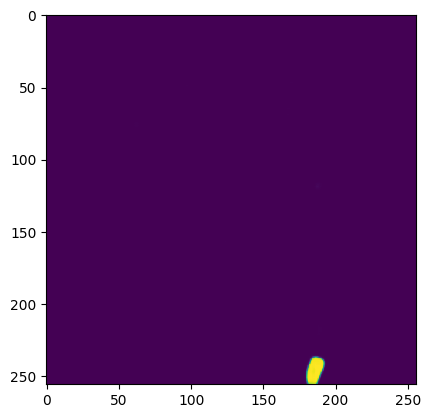

Groundtruth: 


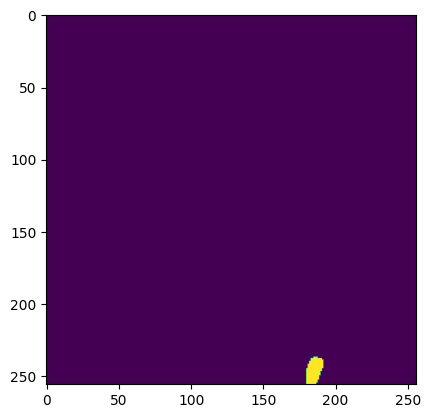

Predict: 


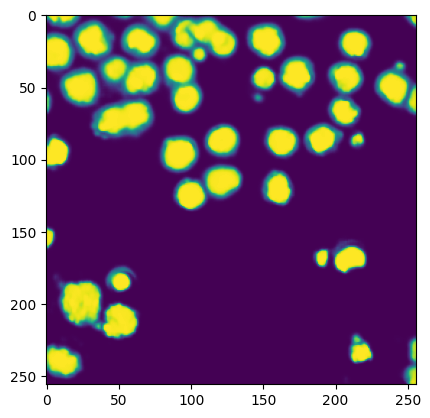

Groundtruth: 


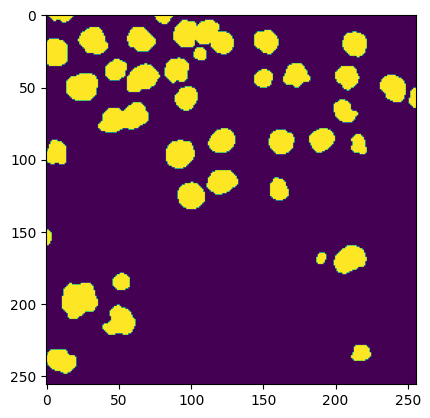

Predict: 


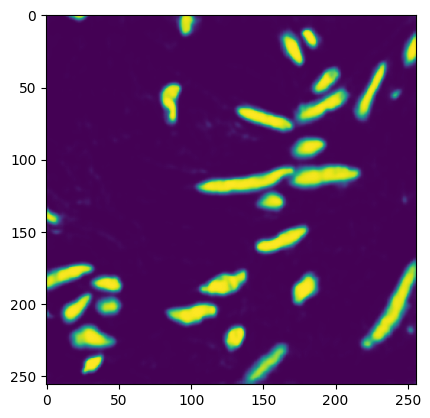

Groundtruth: 


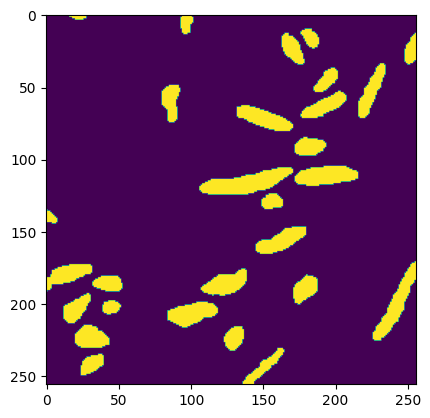

Predict: 


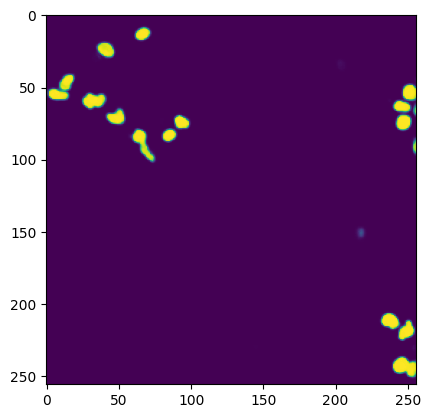

Groundtruth: 


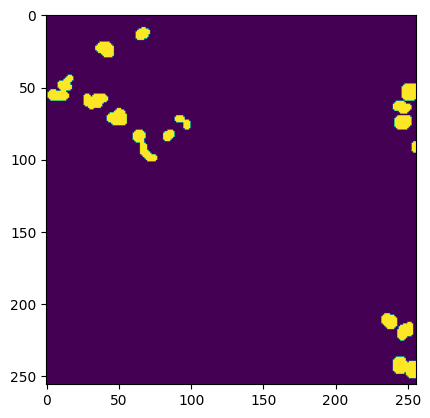

Predict: 


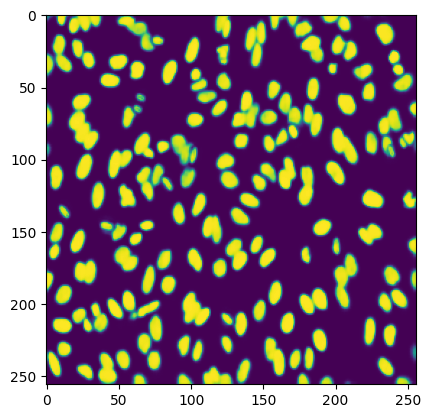

Groundtruth: 


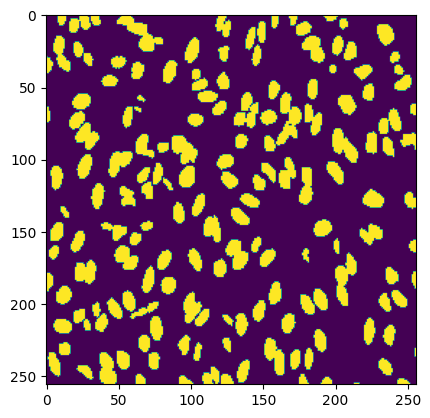

Predict: 


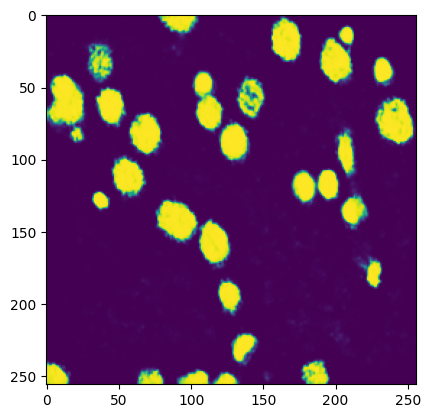

Groundtruth: 


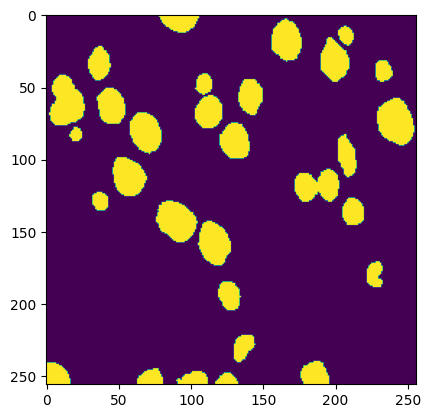

Predict: 


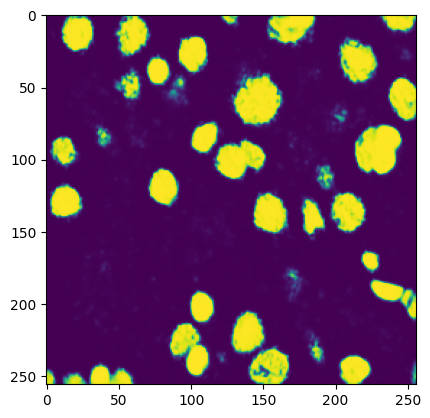

Groundtruth: 


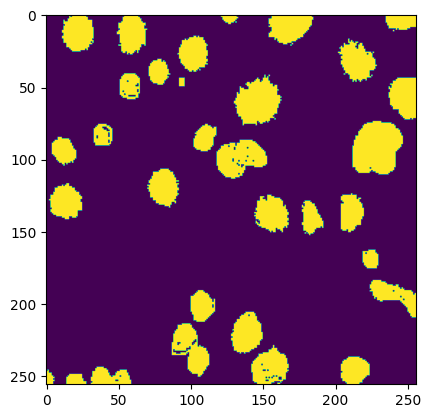

Predict: 


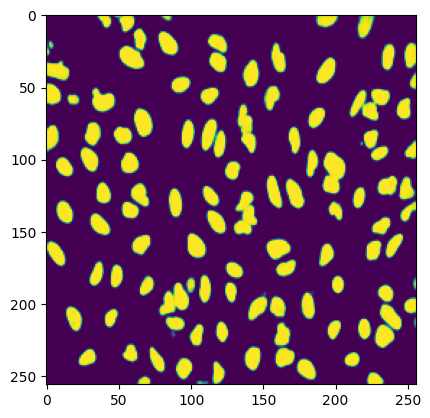

Groundtruth: 


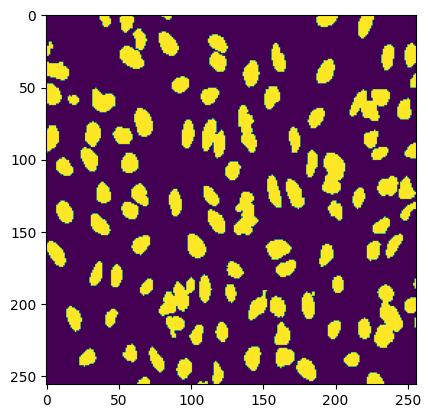

Predict: 


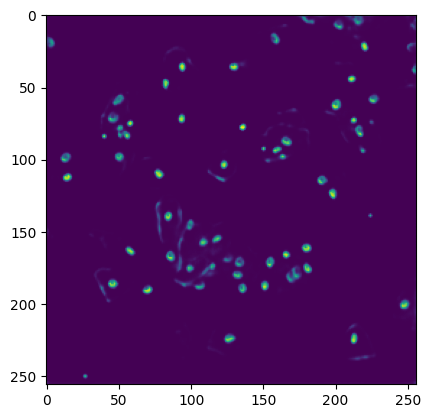

Groundtruth: 


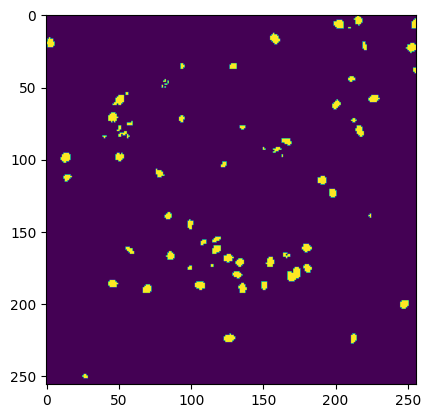

Predict: 


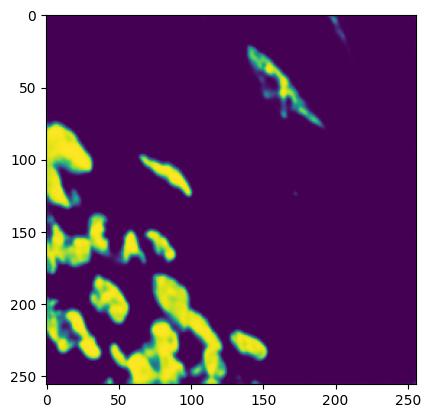

Groundtruth: 


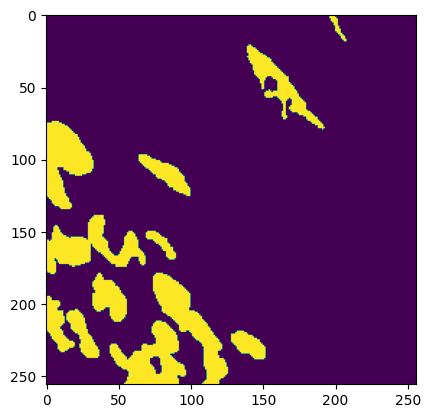

In [46]:
#visualizes both the model's predictions and the corresponding ground truth labels
get = 10

for i in range(get):
  data, targets = val_datasets[i]
  result = inference(data)
  print('Predict: ')
  imshow_from_tensor(result)
  print('Groundtruth: ')
  imshow_from_tensor(targets)

In [47]:
class NucleuDataTest(Dataset):
  def __init__(self, files_list):
    super().__init__()
    self.files_list = files_list
    self.train = train
  #magic method
  def __len__(self):
    return len(self.files_list)

  def __getitem__(self, idx):
    file_name = os.path.join(PATH_TEST, self.files_list[idx])
    file_img = os.path.join(file_name, f'images/{self.files_list[idx]}.png')

    image = Image.open(file_img).convert('RGB')
    image = np.array(image)
    image_ori = image.copy()

    output = data_transforms(image=image)
    image = output['image']

    return image, image_ori

In [48]:
PATH_TEST = 'datasets_used/test/'
test_file_list = os.listdir(PATH_TEST)
print(test_file_list)

['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d', '336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523', '0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466', '9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab', '0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925', '53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4', '0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6', '1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e', '432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580', 'e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258', '31f1fbe85b8899258ea5bcf5f93f7ac8238660c386aeab40649c715bd2e38a0a', '4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee', '295682d9eb5acb5c1976a460c085734bfaf38482b0a3f02591c2bfdcd4128549', '38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990c535d1030637bf6a1f', '4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a

In [49]:
test_datasets = NucleuDataTest(test_file_list)

Prediction


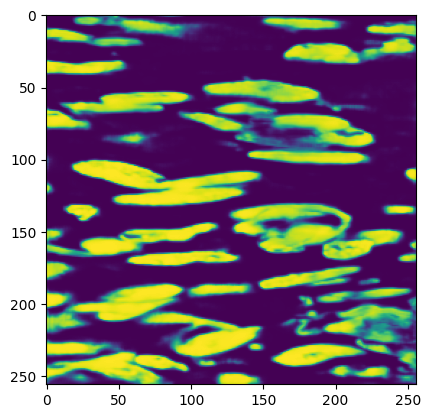

original_image


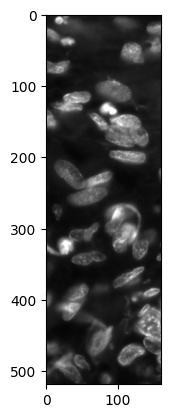

Prediction


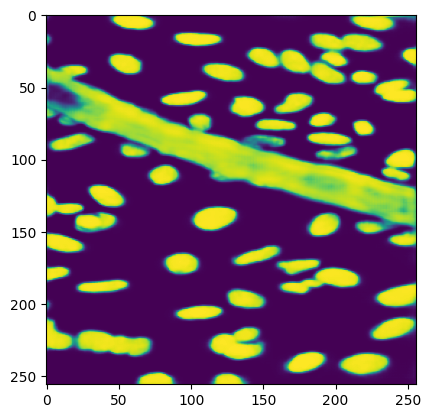

original_image


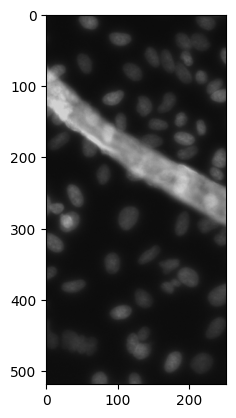

Prediction


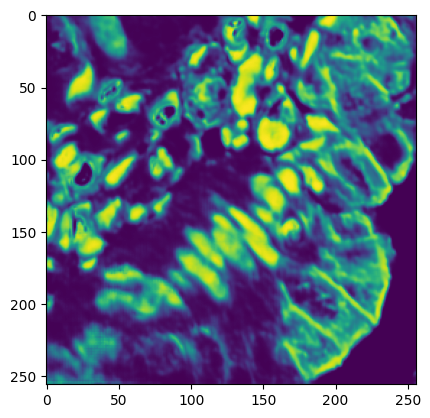

original_image


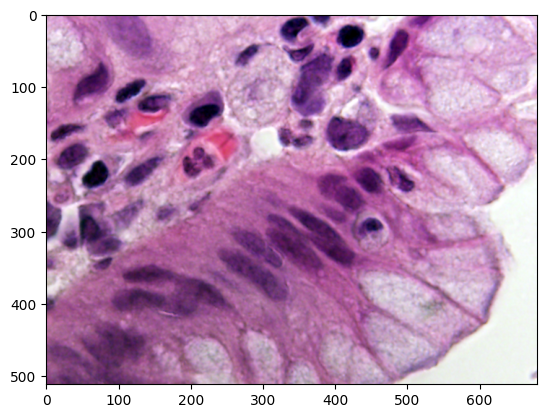

Prediction


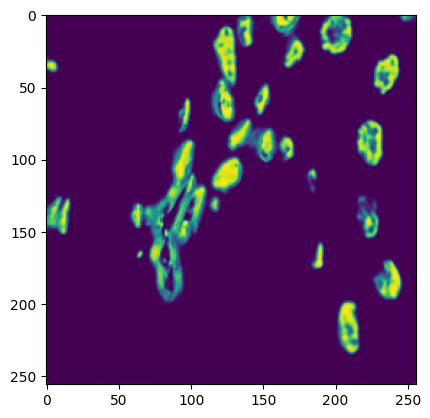

original_image


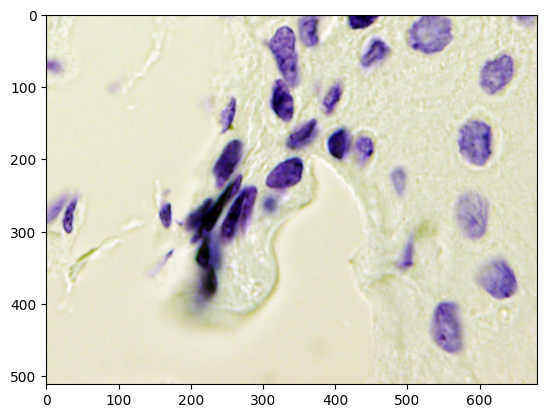

Prediction


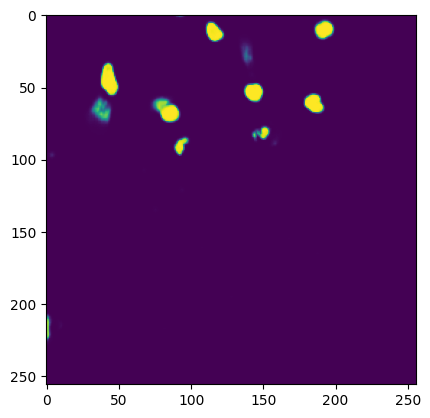

original_image


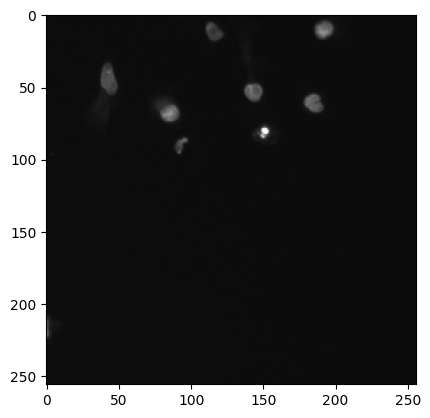

Prediction


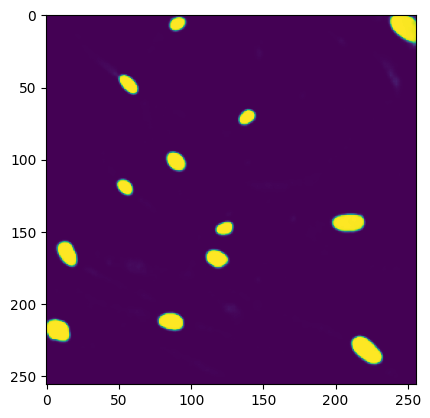

original_image


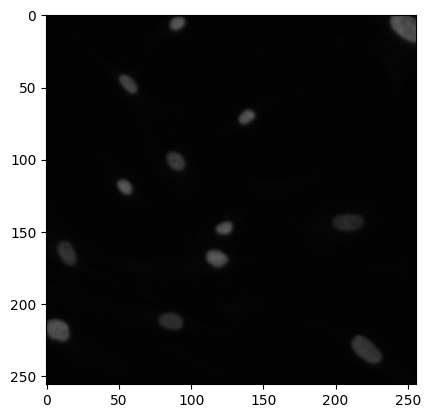

Prediction


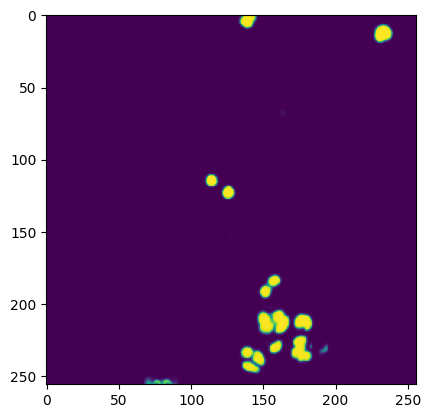

original_image


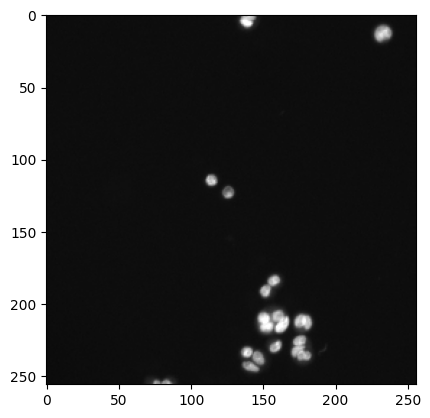

Prediction


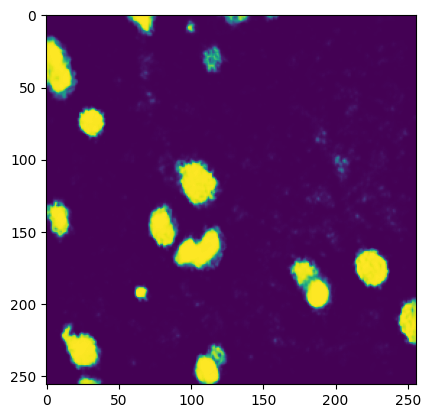

original_image


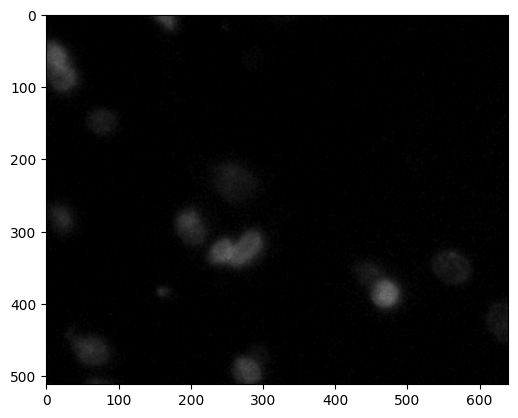

Prediction


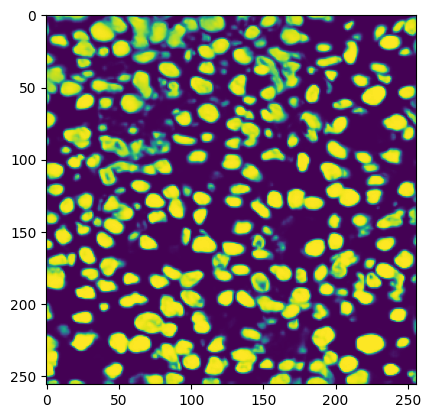

original_image


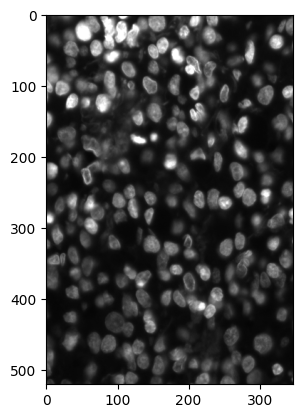

Prediction


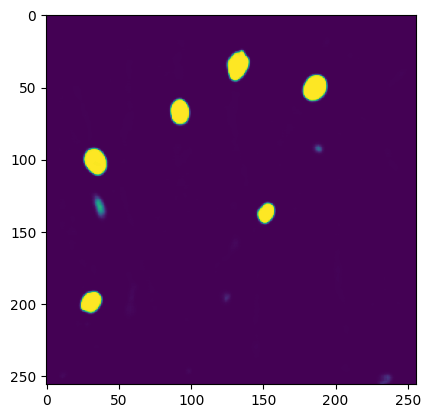

original_image


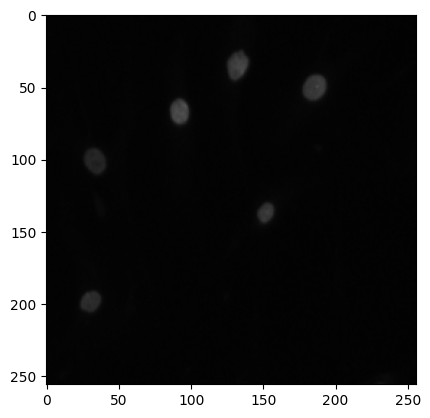

In [50]:
get = 10

for i in range(get):
  data, image_ori = test_datasets[i]
  result = inference(data)
  print('Prediction')
  imshow_from_tensor(result)
  print('original_image')
  imshow(image_ori)